In [67]:
from sklearn.linear_model import SGDClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
import time

In [29]:
digits = load_digits() 
data = digits.data
target = digits.target
X_train, X_test, y_train, y_test = train_test_split(data, target, 
                                                    test_size=0.2, random_state=923)

In [23]:
sgd = SGDClassifier(max_iter = 100, loss = 'log', 
                   penalty='none', tol=1e-3, n_jobs=-1)
#grid search eta0 
parameters = {'eta0': [0.001, 0.0001, 0.01, 0.00001, 10],  
                  'learning_rate': ['constant']}
clf = GridSearchCV(sgd, parameters, cv=5)

In [24]:
clf.fit(X_test, y_test)
print(clf.best_params_) #'eta0': 0.0001, 'learning_rate': 'constant'

{'eta0': 0.0001, 'learning_rate': 'constant'}


In [26]:
clf.score(X_val, y_val)

0.9375

In [28]:
sgd_best = SGDClassifier(loss = 'log',penalty='none', tol=1e-3, 
                         eta0=0.001, learning_rate='constant')

In [49]:
param_range = np.logspace(0, 2, 10)
train_scores, test_scores = validation_curve(sgd_best, 
            X_train, y_train, param_name = "max_iter", param_range = param_range, 
            cv=5, scoring="accuracy", n_jobs=-1)

/home/mobeiusprime/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/mobeiusprime/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/mobeiusprime/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/mobeiusprime/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  Converge

In [50]:
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(test_scores, axis=1)

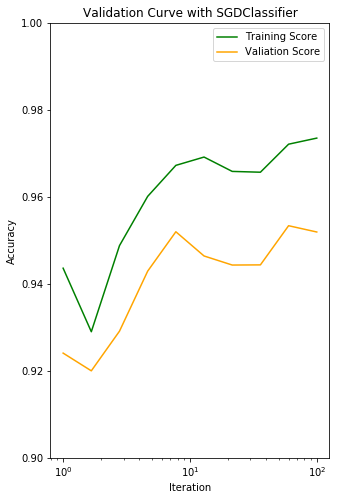

In [66]:
# Confusion Matrix and Training Speed (time and iteration)
plt.title("Validation Curve with SGDClassifier")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.semilogx(param_range, train_scores_mean, label="Training Score", color="green")
plt.semilogx(param_range, val_scores_mean, label="Valiation Score", color="orange")
plt.legend(loc="best")
plt.rcParams["figure.figsize"] = [5, 8]
plt.show()

In [72]:
times = [] 
train_scores = [] 
test_scores = [] 
for iteration in param_range: 
    sgd_temp = SGDClassifier(loss = 'log',penalty='none', tol=1e-3, eta0=0.001, learning_rate='constant', max_iter = iteration)
    sgd_temp.fit(X_train, y_train)
    start = time.time() 
    train_scores.append(sgd_temp.score(X_train, y_train))
    test_scores.append(sgd_temp.score(X_test, y_test))
    times.append(time.time()-start)
    
print(times) 
print("")
print(train_scores)
print("")
print(test_scores)

[0.02600240707397461, 0.0004661083221435547, 0.0038683414459228516, 0.0034155845642089844, 0.0005147457122802734, 0.0005033016204833984, 0.0005106925964355469, 0.00048661231994628906, 0.0005292892456054688, 0.0004994869232177734]

[0.92762700069589421, 0.95407098121085598, 0.93249826026443983, 0.9610299234516354, 0.96311760612386921, 0.95546276965901178, 0.97007654836464863, 0.9624217118997912, 0.97355601948503823, 0.97007654836464863]

[0.93611111111111112, 0.95833333333333337, 0.93611111111111112, 0.96944444444444444, 0.96666666666666667, 0.95833333333333337, 0.97499999999999998, 0.94999999999999996, 0.98055555555555551, 0.96111111111111114]


/home/mobeiusprime/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


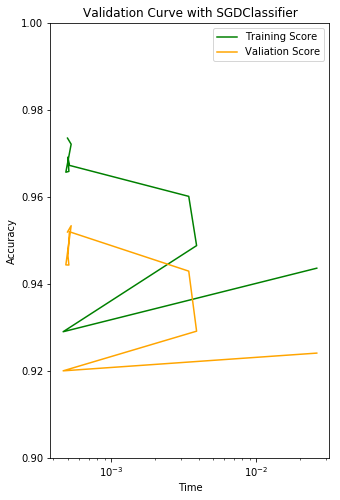

In [73]:
plt.title("Validation Curve with SGDClassifier")
plt.xlabel("Time")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.semilogx(times, train_scores_mean, label="Training Score", color="green")
plt.semilogx(times, val_scores_mean, label="Valiation Score", color="orange")
plt.legend(loc="best")
plt.rcParams["figure.figsize"] = [5, 8]
plt.show()